In [1]:
import numpy as np

In [2]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
# suppose we want to access three different elements

[x[3], x[7], x[2]]

[71, 86, 14]

In [4]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*

In [5]:
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
# fancy indexing also works in multiple dimensions

X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
# like with standard indexing, first index refers to the row
# and the second to the column

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [8]:
# the pairing indices in fancy indexing follows all the broadcasting rules 
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [9]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

With fancy indexing, the return value reflects the broadcasted shape of indices, rather than the shape of the array being indexed.

# COMBINED INDEXING

In [11]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [13]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [14]:
# combining fancy indexing with masking:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# EXAMPLE: SELECTING RANDOM POINTS

For example, we might have and N by D matrix representing N poins in D dimensions

In [15]:
mean = [0, 0]
cov = [[1, 2],
        [2, 5]]

X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

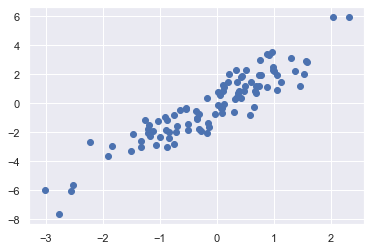

In [17]:
# visualizing the points
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

plt.scatter(X[:, 0], X[:, 1]);

Select 20 random points<br>
Choose 20 random indices with no repeats<br>
Use these indices to select a portion of the original array

In [18]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([26, 33, 23, 44, 95, 85, 94, 65, 60, 74, 14, 46, 72, 75, 88, 91, 99,
       32,  4, 92])

In [19]:
selection = X[indices]
selection.shape

(20, 2)

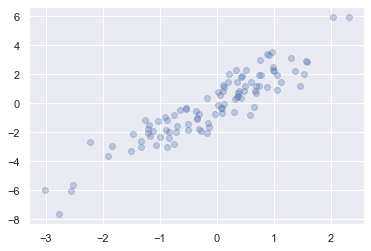

In [20]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor="none", s=200);

# MODIFYING VALUES WITH FANCY INDEXING



In [21]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [22]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [23]:
# unexpected results
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The result of this operation is to first assign x[0] = 4<br>
followed by x[0] = 6

In [24]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print(x)

[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


This is because x[i] += 1 is meant as a shorthand of<br>
x[i] = x[i] + 1<br>
x[i] + 1 is evaluated, and then the result is assigned to the indices in x<br>
It id not the augmentation that happens multiple times, but the assignment<br>
For this, we can use the "at()" method of ufuncs

The "at()" methos does an in-place application of the given operator at the specified indices (i) with the specified value (1)

In [25]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# EXAMPLE: BINNING DATA

For example, we have 1000 values and would like to quickly find where they fall within an array of bins

In [26]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

The counts now reflect the number of points within each bin

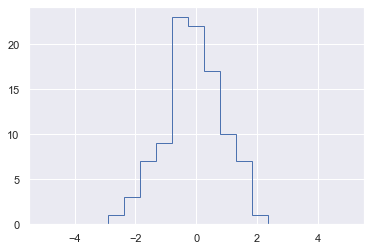

In [29]:
# plot the results
plt.hist(x, bins, histtype="step");

To compute the binning, matplotlib uses the np.histogram function, which does a very similar computation

In [30]:
print("NumPy routine: ")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine: ")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine: 
79.6 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine: 
32.8 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [33]:
# But NumPy's algorithm is more flexible, 
# and particularly is designed for better performance 
# when the number of data points becomes large

x = np.random.randn(1000000)
print("NumPy routine: ")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine: ")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)


NumPy routine: 
89.2 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine: 
179 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
